<div class="alert alert-info">
<h1>visualization GLM</h2>
</div>

## Visualization tests for 1st level GLM

In [5]:
import nibabel as nib
from nilearn import plotting

C:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\nilearn\plotting\img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


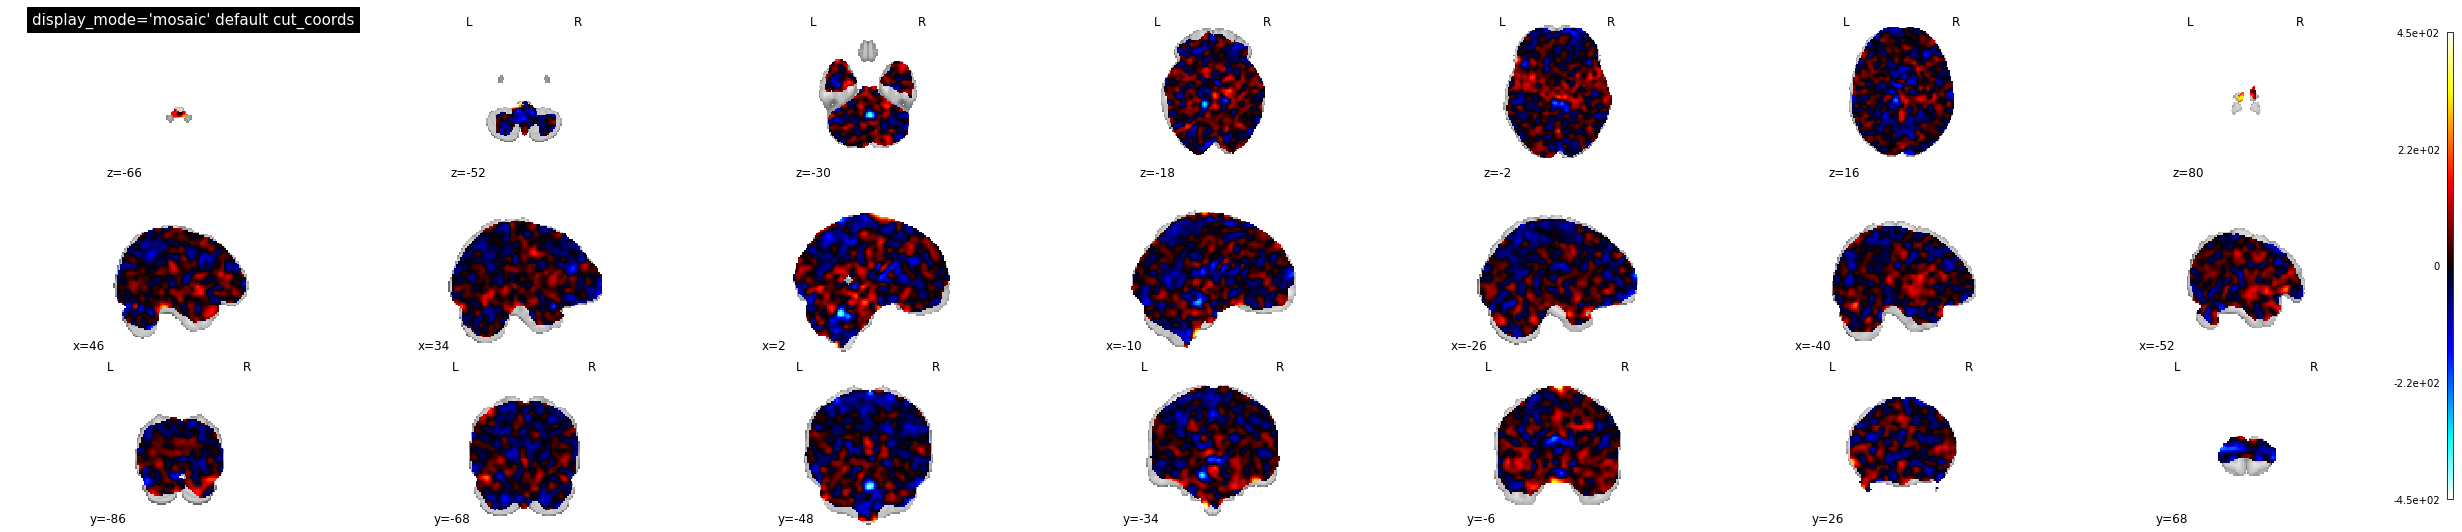

In [7]:

path = r'C:\Users\Dylan\Desktop\UM_Bsc_neurocog\UM_E22\Projet_Ivado_rainvillelab\results_GLM\test_res_GLM\neut_shocks_hrfmodel_fri\APM_05_H2\beta_map_APM_05_H2_hyper_hypo_Neut_shocks.nii'
img = nib.load(path)

#view = plotting.view_img_on_surf(img,colorbar = True,surf_mesh='fsaverage',title = 'Raw z map')
plotting.plot_stat_map(img, display_mode='mosaic',
                       title="display_mode='mosaic' default cut_coords")
html_view = plotting.view_img(img, threshold='98%', cut_coords=[-42, -16, 52], title='img1 : FRI')
html_view.open_in_browser()

In [9]:
path2 = r'C:\Users\Dylan\Desktop\UM_Bsc_neurocog\UM_E22\Projet_Ivado_rainvillelab\results_GLM\099_TxT_Individual_N-SHOCKS_files\APM05_NSHOCKS_con089.hdr'
img2 = nib.load(path2)

html_view = plotting.view_img(img2, threshold='98%', cut_coords=[-42, -16, 52], title='reference SPM')
html_view.open_in_browser()

C:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\nilearn\_utils\niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


In [10]:
path3 =r'C:\Users\Dylan\Desktop\UM_Bsc_neurocog\UM_E22\Projet_Ivado_rainvillelab\results_GLM\test_res_GLM\neut_shocks _sliceT_0.33\APM_05_H2\beta_map_APM_05_H2_hyper_hypo_Neut_shocks.nii'
    
img3 = nib.load(path3)

html_view = plotting.view_img(img3, threshold='98%', cut_coords=[-42, -16, 52], title='slice timing = .33')
html_view.open_in_browser()

In [11]:
path4 =r'C:\Users\Dylan\Desktop\UM_Bsc_neurocog\UM_E22\Projet_Ivado_rainvillelab\results_GLM\test_res_GLM\neut_shocks _sliceT_1\neut_shocks\APM_05_H2\beta_map_APM_05_H2_hyper_hypo_Neut_shocks.nii'
    
img4 = nib.load(path4)

html_view = plotting.view_img(img4, threshold='98%', cut_coords=[-42, -16, 52], title='img4 : slice timing = 1')
html_view.open_in_browser()

In [12]:
path5 =r'C:\Users\Dylan\Desktop\UM_Bsc_neurocog\UM_E22\Projet_Ivado_rainvillelab\results_GLM\test_res_GLM\neut_shocks _sliceT_1_min_onset0\neut_shocks\APM_05_H2\beta_map_APM_05_H2_hyper_hypo_Neut_shocks.nii'
    
img5 = nib.load(path5)

html_view = plotting.view_img(img5, threshold='98%', cut_coords=[-42, -16, 52], title='img5 : onset=0')
html_view.open_in_browser()

In [13]:
path6 =r'C:\Users\Dylan\Desktop\UM_Bsc_neurocog\UM_E22\Projet_Ivado_rainvillelab\results_GLM\test_res_GLM\neut_shocks_sliceT_05_stattype_t\APM_05_H2\beta_map_APM_05_H2_hyper_hypo_Neut_shocks.nii'
    
img6 = nib.load(path5)

html_view = plotting.view_img(img6, threshold='98%', cut_coords=[-42, -16, 52], title='slice_timing 0.5')
html_view.open_in_browser()

<div class="alert alert-info">
<h1>visualization second level</h2>
</div>

### visualiaztion of diferent thresholds from a second level map
#### Input required : z_map

In [1]:
#---THRESHOLD---
from nilearn.glm import threshold_stats_img
from nilearn import plotting

#p < .001 uncorrected
thresholded_map1, threshold1 = threshold_stats_img(
    z_map,
    alpha=.001,
    height_control='fpr',
    cluster_threshold=10,
    two_sided=True,
)
print('p < .001 uncorrected threshold : ', threshold1)

#fdr = .05
thresholded_map2, threshold2 = threshold_stats_img(
    z_map, alpha=.05, height_control='fdr')
print('The FDR=.05 threshold is %.3g' % threshold2)

#Bonferroni correction
thresholded_map3, threshold3 = threshold_stats_img(
    z_map, alpha=.05, height_control='bonferroni')
print('The p<.05 Bonferroni-corrected threshold is %.3g' % threshold3)

#-----PLOT-----
#Raw results
display = plotting.plot_stat_map(z_map, title='Raw z map')
view = plotting.view_img_on_surf(z_map,colorbar = True,surf_mesh='fsaverage',title = 'Raw z map')
view.open_in_browser()

#p < .001 uncorrected
plotting.plot_stat_map(
thresholded_map1, cut_coords=display.cut_coords, threshold=threshold1,
title='Thresholded z map, fpr <.001, clusters > 10 voxels')
view = plotting.view_img_on_surf(thresholded_map1,threshold = threshold1,colorbar = True,surf_mesh='fsaverage',title = 'Thresholded z map, fpr <.001, clusters > 10 voxels')
view.open_in_browser()

#fdr = .05
plotting.plot_stat_map(thresholded_map2, cut_coords=display.cut_coords,
                    title='Thresholded z map, expected fdr = .05',
                    threshold=threshold2)
view = plotting.view_img_on_surf(thresholded_map2,threshold =threshold2 ,colorbar = True,surf_mesh='fsaverage',title = 'Thresholded z map, expected fdr = .05')
view.open_in_browser()

#Bonferroni correction
plotting.plot_stat_map(thresholded_map3, cut_coords=display.cut_coords,
                    title='Thresholded z map, expected fwer < .05',
                    threshold=threshold3)
view = plotting.view_img_on_surf(thresholded_map3,threshold =threshold3 ,colorbar = True,surf_mesh='fsaverage',title = 'Thresholded z map, expected fwer < .05')
view.open_in_browser()


C:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\nilearn\glm\__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


NameError: name 'z_map' is not defined